In [ ]:

!pip install -q keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 694.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [
    keras_ocr.tools.read(img) for img in ['image_1.jpg',
                                          'image_2.png'
                                          ]
]

In [ ]:
len(images)

2

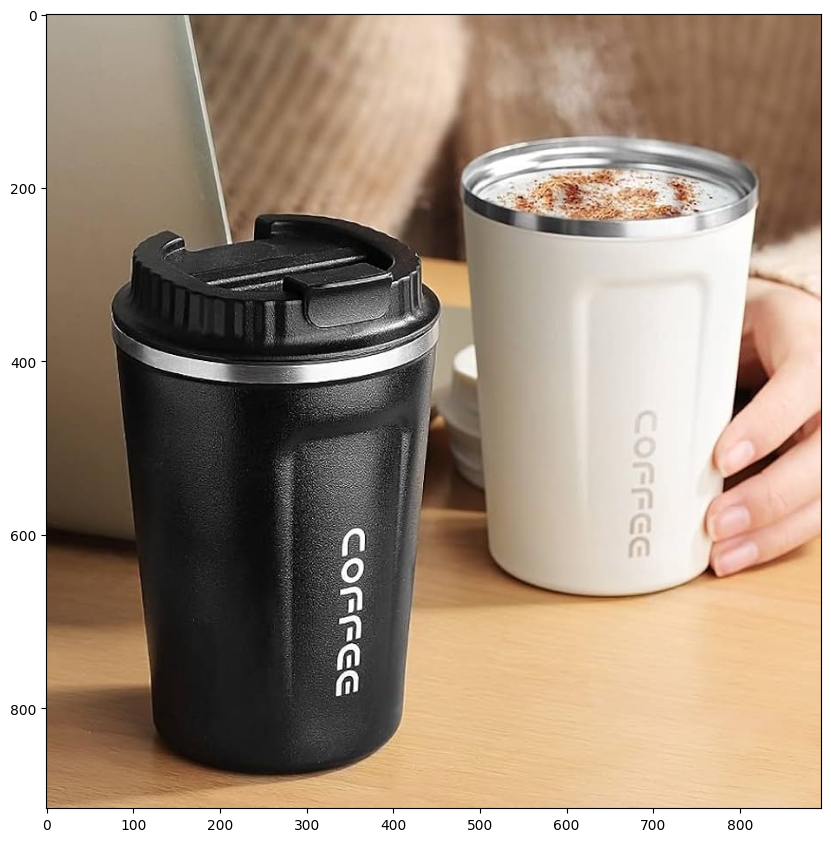

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(images[0])

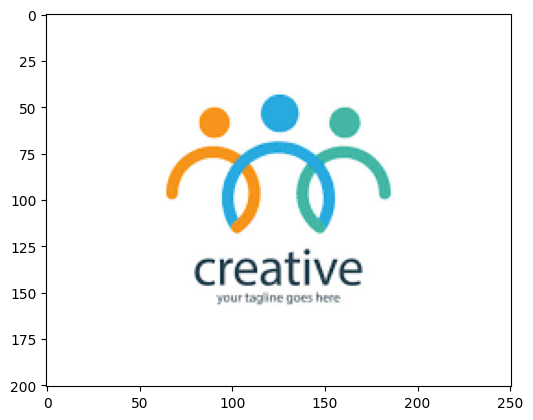

In [ ]:
plt.figure(figsize = (6,12))
plt.imshow(images[1])

In [ ]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 10s 10s/step


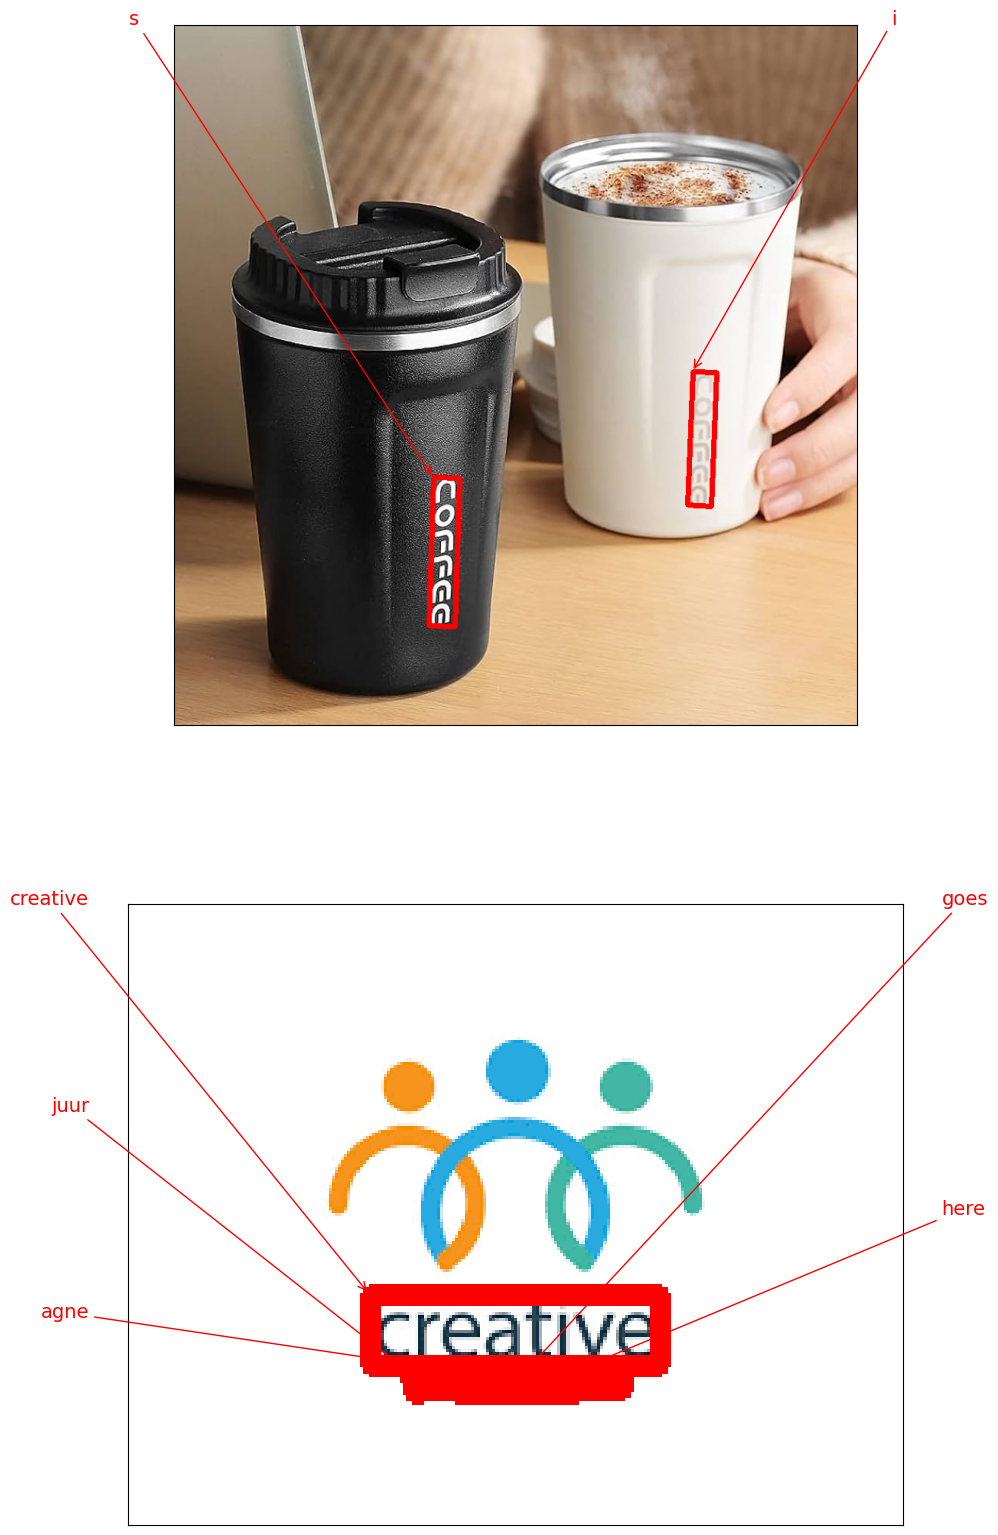

In [ ]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10,20))
for ax, image, predictions in zip(axs, images, prediction_groups):
  keras_ocr.tools.drawAnnotations(image=image,
                                  predictions=predictions,
                                  ax=ax)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Step 1: Dataset Preparation
def load_dataset(dataset_dir):
    images = []
    labels = []
    for filename in os.listdir(dataset_dir):
        if filename.endswith(".jpg"):
            img = load_img(os.path.join(dataset_dir, filename), color_mode='grayscale', target_size=(28, 28))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(int(filename[0]))  # Assuming labels are the first character of the filename
    return np.array(images), np.array(labels)

# Step 2: CNN Architecture
def create_ocr_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Step 3: Preprocessing
def preprocess_data(images, labels):
    images = images / 255.0  # Normalize pixel values to [0, 1]
    return images, labels

# Step 4: Handling Overfitting
# Implement dropout, data augmentation, or regularization as needed

# Step 5: Model Training
def train_model(X_train, y_train, X_val, y_val, input_shape, num_classes):
    model = create_ocr_model(input_shape, num_classes)
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
    return model, history

# Step 6: Evaluation Metrics
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    return loss, accuracy

# Step 7: Prediction and Visualization
def predict_and_visualize(model, images, labels):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    # Visualize some predictions
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f'Predicted: {predicted_labels[i]}, True: {labels[i]}')
        ax.axis('off')
    plt.show()

# Main function
def main():
    # Step 1: Load dataset
    dataset_dir = "dataset/"
    X, y = load_dataset(dataset_dir)

    # Step 3: Preprocess data
    X_processed, y_processed = preprocess_data(X, y)

    # Step 4: Split dataset into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Step 5: Define input shape and number of classes
    input_shape = X_train.shape[1:]
    num_classes = len(np.unique(y))

    # Step 5: Train model
    model, history = train_model(X_train, y_train, X_val, y_val, input_shape, num_classes)

    # Step 6: Evaluate model
    loss, accuracy = evaluate_model(model, X_test, y_test)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

    # Step 7: Predict and visualize
    predict_and_visualize(model, X_test[:9], y_test[:9])

if __name__ == "__main__":
    main()


SyntaxError: invalid syntax (<ipython-input-13-d42012d0f3f0>, line 16)